# Google Playstore Case Study

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?


# Changing directory

### We can change directory as required
import os
os.chdir(r'C:\Users\')
os.getcwd()

# Importing librarires

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the libraries
import pandas as pd
import numpy as np

In [3]:
#import the plotting libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
google = pd.read_csv("googleplaystore_v2.csv")

In [6]:
#read the dataset and check the first five rows
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19000.00,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14000.00,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8700.00,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25000.00,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2800.00,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
#Checking the shape of the dataframe
google.shape

(10841, 13)

In [8]:
#creating independent copy of dataframe
df_original = google.copy()

# Handling Duplicate Data

In [9]:
#removing duplicated data
google.duplicated().sum()

483

In [10]:
google.drop_duplicates(inplace=True)

In [11]:
print(df_original.shape,google.shape,"\nNumber of duplicate data: ",df_original.shape[0]-google.shape[0])

(10841, 13) (10358, 13) 
Number of duplicate data:  483


### Data Handling and Cleaning

In [12]:
#Checking the datatypes of all the columns of the dataframe
google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [13]:
#for better code readability and consistency column names are normalized
google.columns = google.columns.str.replace(' ','_').str.lower()

In [14]:
google.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

#### Missing Value Treatment

In [15]:
#Checking the number of null values in the columns
google.isnull().sum()

app                  0
category             0
rating            1465
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [16]:
#Drop the rows having null values in the Rating field
google.dropna(subset=['rating'],inplace=True)

#Check the shape of the dataframe
google.shape

(8893, 13)

In [17]:
# Checking the number of nulls in the Rating field again to cross-verify
google.rating.isnull().sum()

0

In [18]:
#Checking the number of nulls in the dataframe again and find the total number of null values
google.isnull().sum()


app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              0
price             0
content_rating    1
genres            0
last_updated      0
current_ver       4
android_ver       3
dtype: int64

In [19]:
#Inspecting the nulls in the Android Version column
google[google['android_ver'].isna()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.40,230,11000.00,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.50,189,2100.00,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00,3.0M,21516.53,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
google.loc[10472,:]

app               Life Made WI-Fi Touchscreen Photo Frame
category                                              1.9
rating                                              19.00
reviews                                              3.0M
size                                             21516.53
installs                                             Free
type                                                    0
price                                            Everyone
content_rating                                        NaN
genres                                  February 11, 2018
last_updated                                       1.0.19
current_ver                                    4.0 and up
android_ver                                           NaN
Name: 10472, dtype: object

In [21]:
google.loc[[10472]]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00,3.0M,21516.53,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
#Dropping the row having shifted values
google.drop(index=10472,inplace=True)


In [23]:
#Checking the nulls again in Android version column to cross-verify
google[google['android_ver'].isna()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.40,230,11000.00,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.50,189,2100.00,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values by mode since it's a categorical feature


In [24]:
#Checking the most common value in the Android version column
google['android_ver'].value_counts()

android_ver
4.1 and up            1987
4.0.3 and up          1197
Varies with device    1178
4.0 and up            1094
4.4 and up             789
2.3 and up             573
5.0 and up             481
4.2 and up             331
2.3.3 and up           238
3.0 and up             207
2.2 and up             203
4.3 and up             199
2.1 and up             112
1.6 and up              87
6.0 and up              46
7.0 and up              41
3.2 and up              31
2.0 and up              27
1.5 and up              16
5.1 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              5
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [25]:
google['android_ver'].value_counts().index[0]

'4.1 and up'

In [26]:
#preserving data before feature engineering
df = google.copy()

In [27]:
type(df['android_ver'].mode())

pandas.core.series.Series

In [28]:
df['android_ver'].mode()[0]

'4.1 and up'

In [29]:
type(df['android_ver'].mode()[0])

str

In [30]:
#Fill up the nulls in the Android Version column with the above value
df['android_ver'].fillna(google['android_ver'].mode()[0],inplace=True)

In [31]:
#Check the nulls in the Android version column again to cross-verify
df['android_ver'].fillna(google['android_ver'].mode()[0]).isna().sum()

0

In [32]:
#Checking the nulls in the entire dataframe again
df.isnull().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              0
price             0
content_rating    0
genres            0
last_updated      0
current_ver       4
android_ver       0
dtype: int64

In [33]:
#Checking the most common value in the Current version column
df['current_ver'].value_counts()

current_ver
Varies with device    1258
1.0                    451
1.1                    191
1.2                    126
2.0                    117
                      ... 
0.1.187945513            1
68.0.3440.91             1
4.8.2.2195               1
2.32                     1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [34]:
df['current_ver'].mode()

0    Varies with device
Name: current_ver, dtype: object

In [35]:
#Replacing the nulls in the Current version column with the above value
df['current_ver'].fillna(df['current_ver'].mode()[0],inplace=True)

In [36]:
#Checking the most common value in the Current version column again
df['current_ver'].value_counts()

current_ver
Varies with device    1262
1.0                    451
1.1                    191
1.2                    126
2.0                    117
                      ... 
0.1.187945513            1
68.0.3440.91             1
4.8.2.2195               1
2.32                     1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

#### Handling Incorrect Data Types 

In [37]:
#Checking the datatypes of all the columns 
df.dtypes

app                object
category           object
rating            float64
reviews            object
size              float64
installs           object
type               object
price              object
content_rating     object
genres             object
last_updated       object
current_ver        object
android_ver        object
dtype: object

In [38]:
#Analysing the Price column to check the issue
#String cleaning and data type conversion for Price column
df.price.nunique()

73

In [39]:
df.price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [40]:
#writing the function to make the changes
df.price=df.price.str.strip().str.replace(r'[\$]','',regex=True).astype(float)

In [41]:
df.price.describe()

count   8892.00
mean       0.96
std       16.19
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      400.00
Name: price, dtype: float64

In [43]:
df[df['android_ver']=="4.1 and up" ].groupby('app').agg({'price':'mean'})[:]

,price
app,
+Download 4 Instagram Twitter,0.00
/u/app,0.00
12 Step Meditations & Sober Prayers AA NA AL-ANON,0.00
1LINE – One Line with One Touch,0.00
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.00
...,...
virtual lover 3D,0.00
İşCep,0.00
لعبة تقدر تربح DZ,0.00


In [44]:
df.app.nunique()

8196

In [45]:
#calculating the average price of all apps having the Android version as "4.1 and up" 
df[df['android_ver']=="4.1 and up" ].groupby('app').agg({'price':'mean'})

,price
app,
+Download 4 Instagram Twitter,0.00
/u/app,0.00
12 Step Meditations & Sober Prayers AA NA AL-ANON,0.00
1LINE – One Line with One Touch,0.00
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.00
...,...
virtual lover 3D,0.00
İşCep,0.00
لعبة تقدر تربح DZ,0.00


In [46]:
#Verifying the dtype of Price once again
df.price.dtypes

dtype('float64')

In [47]:
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [48]:
df.reviews.dtypes

dtype('O')

In [49]:
#Analysing the Reviews column
df.reviews.value_counts()

reviews
2          82
3          76
5          74
4          74
1          67
           ..
3157936     1
527247      1
240475      1
5282558     1
398307      1
Name: count, Length: 5992, dtype: int64

In [50]:
#Changing the dtype of this column
df.reviews = df.reviews.astype(float)
#Checking the quantitative spread of this dataframe
df.reviews.describe()


count       8892.00
mean      472776.37
std      2905051.72
min            1.00
25%          164.00
50%         4714.50
75%        71266.75
max     78158306.00
Name: reviews, dtype: float64

In [51]:
#Analysing the Installs Column
df.installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: installs, dtype: object

In [52]:
df.installs.isnull().sum()

0

In [53]:
df.installs.value_counts()

installs
1,000,000+        1486
10,000,000+       1132
100,000+          1110
10,000+            989
1,000+             698
5,000,000+         683
500,000+           516
50,000+            462
5,000+             426
100,000,000+       369
100+               303
50,000,000+        272
500+               199
10+                 69
500,000,000+        61
50+                 56
1,000,000,000+      49
5+                   9
1+                   3
Name: count, dtype: int64

In [54]:
#Cleaning the Installs Column and finding the approximate number of apps at the 50th percentile.
df.installs=df.installs.str.strip().replace('[+,]','',regex=True).astype(int)

In [55]:
print(df.installs.dtypes)

int32


In [56]:
#number of apps at the 50th percentile
df.installs.median()

500000.0

In [57]:
df.app.nunique()

8196

In [58]:

df.installs.describe()

count         8892.00
mean      16489648.15
std       86376000.19
min              1.00
25%          10000.00
50%         500000.00
75%        5000000.00
max     1000000000.00
Name: installs, dtype: float64

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [59]:
#performing the sanity checks on the Rating
df.rating.describe()

count   8892.00
mean       4.19
std        0.52
min        1.00
25%        4.00
50%        4.30
75%        4.50
max        5.00
Name: rating, dtype: float64

In [60]:
#Perform the sanity checks on the Reviews column
df.reviews.nunique()

5992

In [61]:
df[(df.reviews>df.installs)].shape

(7, 13)

In [62]:
df=df[~(df.reviews>df.installs)]

In [63]:
df.shape

(8885, 13)

In [64]:
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [65]:
df.head(2)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159.00,19000.00,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967.00,14000.00,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [117]:
#performing the sanity checks on prices of free apps 
df[(df.app=='Free')&(df.price!=0)]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver


### So there is no obs that type is free but price is bigger than 0

# Based on the business understanding you may apply more sanity checks

#### Outliers Analysis Using Boxplot

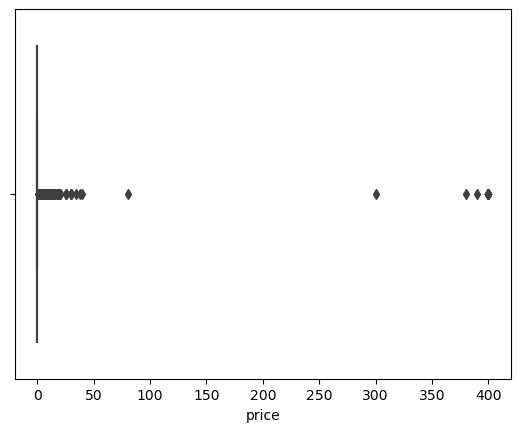

In [67]:
#Create a box plot for the price column
sns.boxplot(x=df.price)
plt.show()

In [68]:
df.price.describe()

count   8885.00
mean       0.96
std       16.20
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      400.00
Name: price, dtype: float64

In [69]:
#Checking the apps with price more than 200
df[df.price>200]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
4197,most expensive app (H),FAMILY,4.30,6.00,1500.00,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.80,718.00,26000.00,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.60,275.00,7300.00,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.80,3547.00,1800.00,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.00,856.00,8700.00,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.80,411.00,2600.00,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.10,1867.00,4700.00,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.90,41.00,2900.00,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.80,93.00,22000.00,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.50,472.00,965.00,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [70]:
expensive_apps=df[df.price>200]

I will remove thoes app that have price greater than $200
# Note: We should decide about keeping outliers , or changing them , or removing them based on business undersatanding

In [71]:
#Cleaning the Price column
df=df[~(df.price>200)]

In [72]:
df.price.describe()

count   8870.00
mean       0.30
std        1.88
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       79.99
Name: price, dtype: float64

In [73]:
df.head(2)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159.00,19000.00,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967.00,14000.00,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [74]:
df.type.value_counts()

type
Free    8275
Paid     595
Name: count, dtype: int64

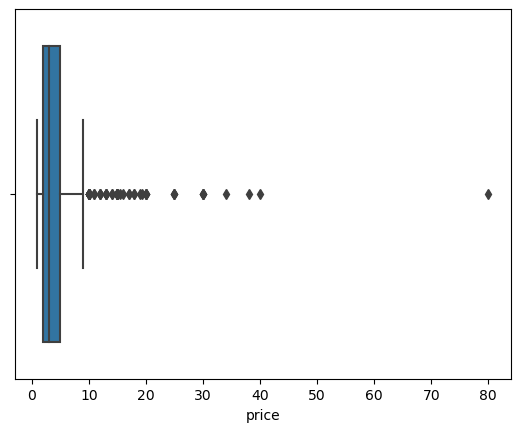

In [75]:
#Create a box plot for paid apps
sns.boxplot(x=df[df.type=='Paid'].price)
plt.show()

In [76]:
#Checking the apps with price more than 30
df[df.price>30]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.60,92.00,32000.00,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.50,214.00,68000.00,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.00,6.00,1300.00,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.20,134.00,1800.00,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [77]:
#Cleaning the Price column again
df=df[~(df.price>30)]

In [78]:
df.shape

(8866, 13)

### Histograms




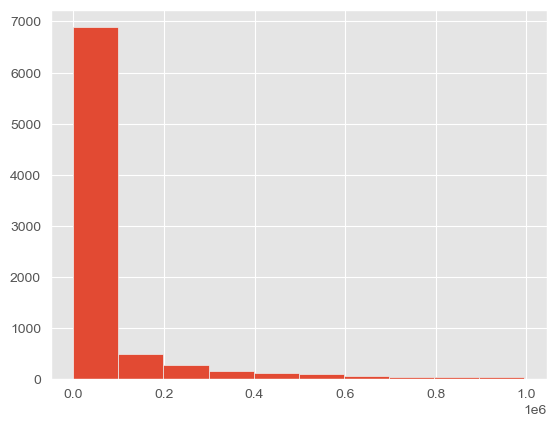

In [118]:
#Creating a histogram of the Reviews
plt.hist(df.reviews)
plt.show()

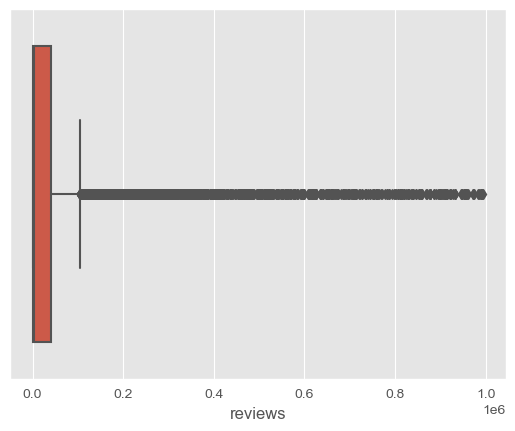

In [119]:
#Creating a boxplot of the Reviews column
sns.boxplot(x=df.reviews)
plt.show()

In [81]:
df.reviews.describe()

count       8866.00
mean      474160.58
std      2909196.06
min            1.00
25%          166.00
50%         4814.00
75%        71474.00
max     78158306.00
Name: reviews, dtype: float64

In [82]:
#Checking records with 1 million reviews
df[df.reviews>=1000000]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.60,2914724.00,21516.53,100000000,Free,0.00,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.90,1433233.00,21516.53,1000000000,Free,0.00,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.40,1254730.00,21516.53,10000000,Free,0.00,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.30,1002861.00,35000.00,100000000,Free,0.00,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.00,1279184.00,21516.53,50000000,Free,0.00,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.60,2721923.00,25000.00,10000000,Free,0.00,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.00,1279800.00,21516.53,50000000,Free,0.00,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.50,5534114.00,53000.00,100000000,Free,0.00,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.40,1351833.00,12000.00,10000000,Free,0.00,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [83]:
# Droping the above records
df=df[~(df.reviews>=1000000)]

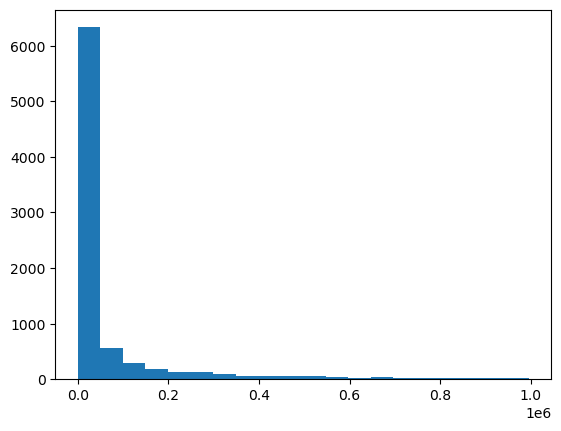

In [84]:
#Create a histogram again and check the peaks
plt.hist(df.reviews,bins=20)
plt.show()

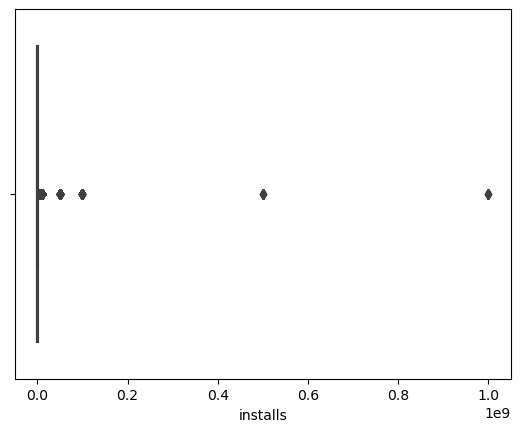

In [85]:
#Create a box plot for the Installs column and report back the IQR
sns.boxplot(x=df.installs)
plt.show()


In [86]:
df.installs.describe()

count         8225.00
mean       4037169.50
std       27000786.39
min              5.00
25%          10000.00
50%         100000.00
75%        1000000.00
max     1000000000.00
Name: installs, dtype: float64

In [87]:
#CLeaning the Installs by removing all the apps having more than or equal to 100 million installs
df[df.installs>=100000000]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.20,814080.00,21516.53,100000000,Free,0.00,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
346,imo beta free calls and text,COMMUNICATION,4.30,659395.00,11000.00,100000000,Free,0.00,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
369,Android Messages,COMMUNICATION,4.20,781810.00,21516.53,100000000,Free,0.00,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
888,IMDb Movies & TV,ENTERTAINMENT,4.20,501498.00,12000.00,100000000,Free,0.00,Teen,Entertainment,"July 26, 2018",Varies with device,Varies with device
903,IMDb Movies & TV,ENTERTAINMENT,4.20,501497.00,12000.00,100000000,Free,0.00,Teen,Entertainment,"July 26, 2018",Varies with device,Varies with device
1083,Google Pay,FINANCE,4.20,347838.00,21516.53,100000000,Free,0.00,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device
1163,Google Pay,FINANCE,4.20,347874.00,21516.53,100000000,Free,0.00,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device
1673,PAC-MAN,GAME,4.20,685981.00,37000.00,100000000,Free,0.00,Everyone,Arcade,"May 15, 2018",6.6.3,4.1 and up
1957,Bus Rush: Subway Edition,GAME,4.10,753043.00,57000.00,100000000,Free,0.00,Teen,Action,"August 1, 2018",1.15.2,4.0.3 and up
2664,Amazon Shopping,SHOPPING,4.30,909226.00,42000.00,100000000,Free,0.00,Teen,Shopping,"July 31, 2018",16.14.0.100,4.4 and up


In [88]:
#CLeaning the Installs by removing all the apps having more than or equal to 100 million installs
df[~(df.installs>=100000000)]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159.00,19000.00,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967.00,14000.00,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510.00,8700.00,5000000,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644.00,25000.00,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967.00,2800.00,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.00,7.00,2600.00,500,Free,0.00,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.50,38.00,53000.00,5000,Free,0.00,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4.00,3600.00,100,Free,0.00,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114.00,21516.53,1000,Free,0.00,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [89]:
df.installs.isnull().sum()

0

In [90]:
df.head(2)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159.00,19000.00,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967.00,14000.00,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8225 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             8225 non-null   object 
 1   category        8225 non-null   object 
 2   rating          8225 non-null   float64
 3   reviews         8225 non-null   float64
 4   size            8225 non-null   float64
 5   installs        8225 non-null   int32  
 6   type            8225 non-null   object 
 7   price           8225 non-null   float64
 8   content_rating  8225 non-null   object 
 9   genres          8225 non-null   object 
 10  last_updated    8225 non-null   object 
 11  current_ver     8225 non-null   object 
 12  android_ver     8225 non-null   object 
dtypes: float64(4), int32(1), object(8)
memory usage: 867.5+ KB


In [92]:
df['size'].dtypes

dtype('float64')

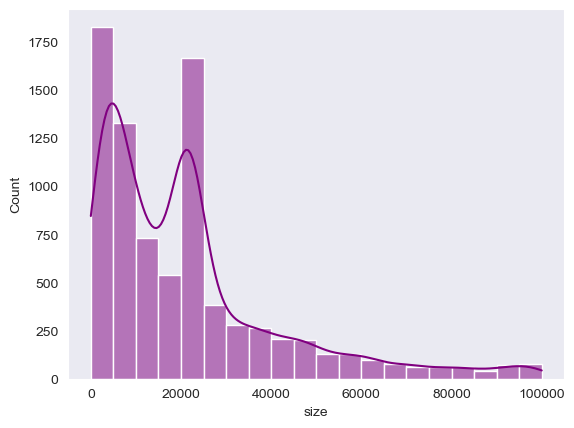

In [93]:
#Plot a histogram for Size as well.
sns.set_style("dark")
sns.histplot(df['size'],kde=True,bins=20,color='purple')
plt.show()

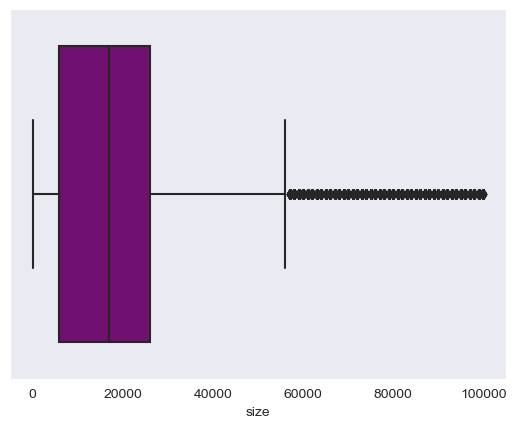

In [94]:
#Create a boxplot for the Size column and report back the median value
sns.boxplot(x=df['size'],color='purple')
plt.show()

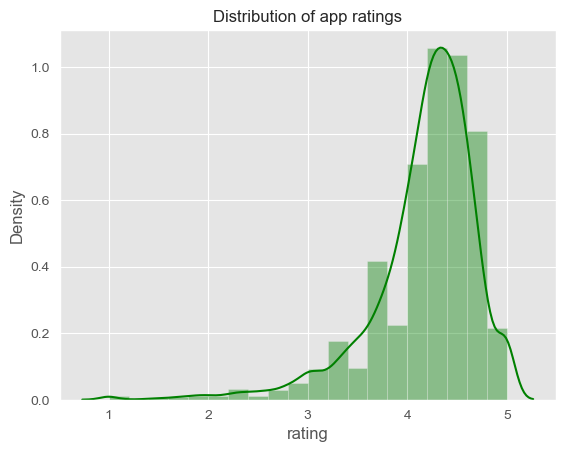

In [95]:
#Create a distribution plot for rating
plt.style.use("ggplot")
sns.distplot(df.rating, bins=20, color="g")
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

### as you can see the gragh is left skewed since most of the apps are free and if one app is not useful the users will unistalled it and don't waste their time to rate it


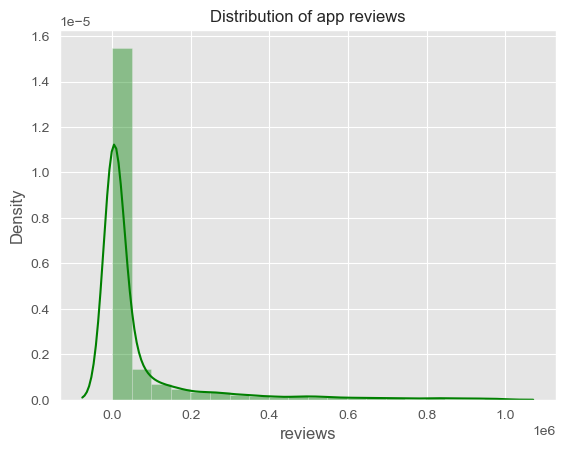

In [96]:
#Create a distribution plot for reviews

sns.distplot(df.reviews, bins=20, color="g")
plt.title("Distribution of app reviews", fontsize=12)
plt.show()

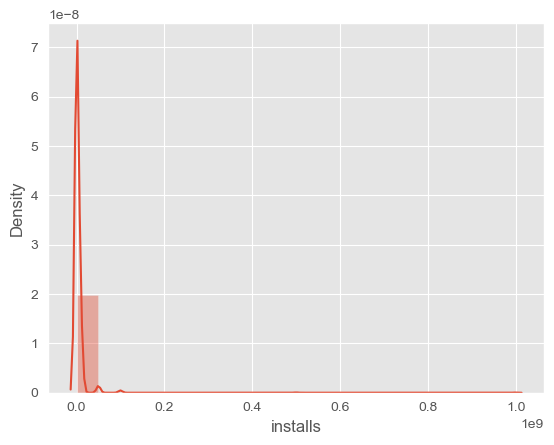

In [98]:
#Creating a distribution plot for installs
sns.distplot(df.installs, bins=20)
plt.show()

#### Pie-Chart and Bar Chart

In [124]:
type_counts=df.type.value_counts()

Text(0.5, 1.0, 'Distribution of App Types')

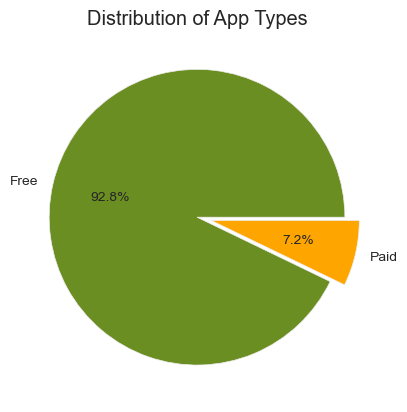

In [134]:
plt.pie(type_counts,labels=type_counts.index,autopct='%1.1f%%', explode=(0,0.1),colors=['olivedrab','orange'])
plt.title('Distribution of App Types')

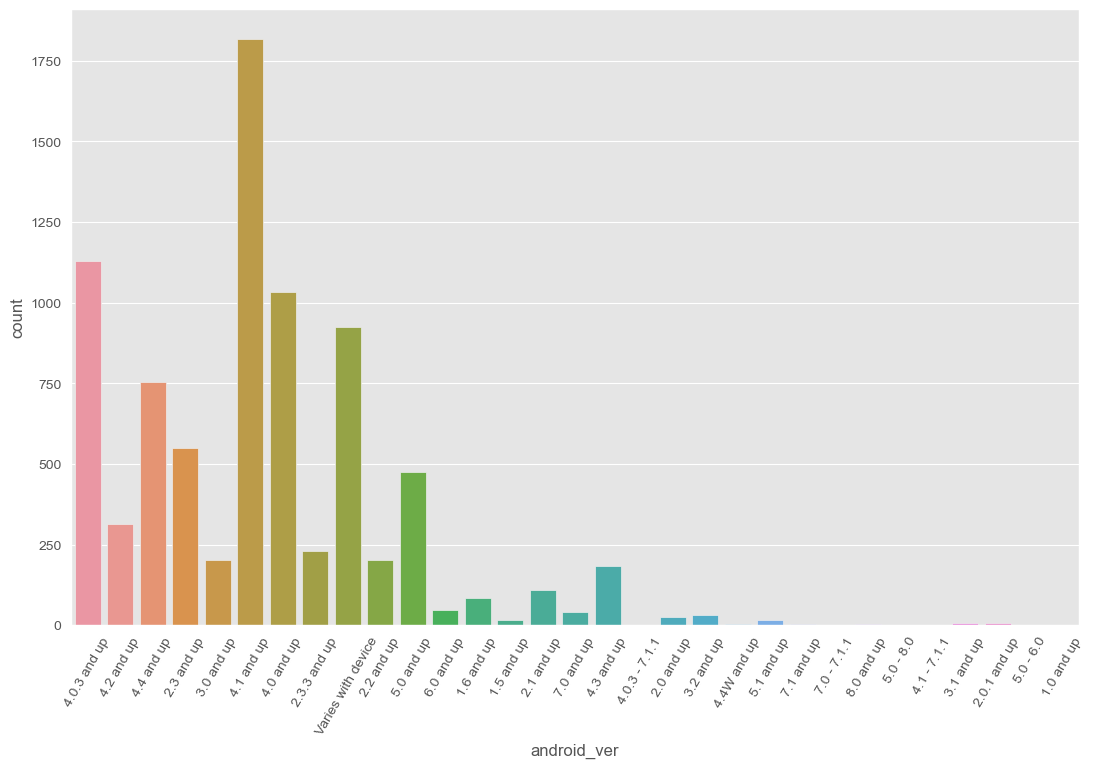

In [145]:
plt.figure(figsize=(13,8))
sns.countplot(x='android_ver',data=df)
plt.xticks(rotation=60)
plt.show()

In [99]:
df.head(2)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159.00,19000.00,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967.00,14000.00,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [100]:
#Analysing the Content Rating column
df.content_rating.value_counts()

content_rating
Everyone           6656
Teen                885
Mature 17+          375
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [101]:
total=df.content_rating.value_counts().sum()

In [102]:
df.content_rating.value_counts()[0]

6656

In [104]:
#Remove the rows with values which are less represented 
df=df[~((df.content_rating=='Adults only 18+')|(df.content_rating=='Unrated'))]

In [105]:
df.shape

(8221, 13)

In [106]:
df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159.00,19000.00,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967.00,14000.00,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510.00,8700.00,5000000,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644.00,25000.00,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967.00,2800.00,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [107]:
#Reset the index
df.reset_index(drop=True,inplace=True)

In [108]:
df

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159.00,19000.00,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967.00,14000.00,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510.00,8700.00,5000000,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644.00,25000.00,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967.00,2800.00,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216,FR Calculator,FAMILY,4.00,7.00,2600.00,500,Free,0.00,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8217,Sya9a Maroc - FR,FAMILY,4.50,38.00,53000.00,5000,Free,0.00,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8218,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4.00,3600.00,100,Free,0.00,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8219,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114.00,21516.53,1000,Free,0.00,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [109]:
#Analyzing Last updated column
df.last_updated.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8221 entries, 0 to 8220
Series name: last_updated
Non-Null Count  Dtype 
--------------  ----- 
8221 non-null   object
dtypes: object(1)
memory usage: 64.4+ KB


In [110]:
df.last_updated.isnull().sum()

0

In [111]:
print(df.last_updated.dtypes)

object


In [112]:
df.last_updated=df.last_updated.apply(lambda x: pd.to_datetime(x))

In [113]:
print(df.last_updated.dtypes)

datetime64[ns]


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8221 entries, 0 to 8220
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             8221 non-null   object        
 1   category        8221 non-null   object        
 2   rating          8221 non-null   float64       
 3   reviews         8221 non-null   float64       
 4   size            8221 non-null   float64       
 5   installs        8221 non-null   int32         
 6   type            8221 non-null   object        
 7   price           8221 non-null   float64       
 8   content_rating  8221 non-null   object        
 9   genres          8221 non-null   object        
 10  last_updated    8221 non-null   datetime64[ns]
 11  current_ver     8221 non-null   object        
 12  android_ver     8221 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(1), object(7)
memory usage: 803.0+ KB


# This is part of the Exploratory data analysis